In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
air=pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

In [3]:
air=air[(air["Investigation.Type"]=="Accident")]

In [4]:
air["Total.Fatal.Injuries"].fillna(0,inplace=True)
air["Total.Serious.Injuries"].fillna(0,inplace=True)

In [5]:
air

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,0.0,0.0,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,0.0,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,0.0,0.0,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,0.0,0.0,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
5,20191228X23853,Accident,CEN20MA044,2019-12-28,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,Executive/Corporate,NaN,5.0,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,06/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16/04/1980
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/09/2000
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,NaN,NaN,IMC,CRUISE,Probable Cause,26/02/2007
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19/09/1996


In [6]:
air2=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries",'Weather.Condition']])

In [7]:
air2=air2.dropna(how='any',axis=0)
air2["Injuries+Fatal"]=air2["Total.Fatal.Injuries"]+air2["Total.Serious.Injuries"]
air2=air2[(air2["Injuries+Fatal"]<100)]

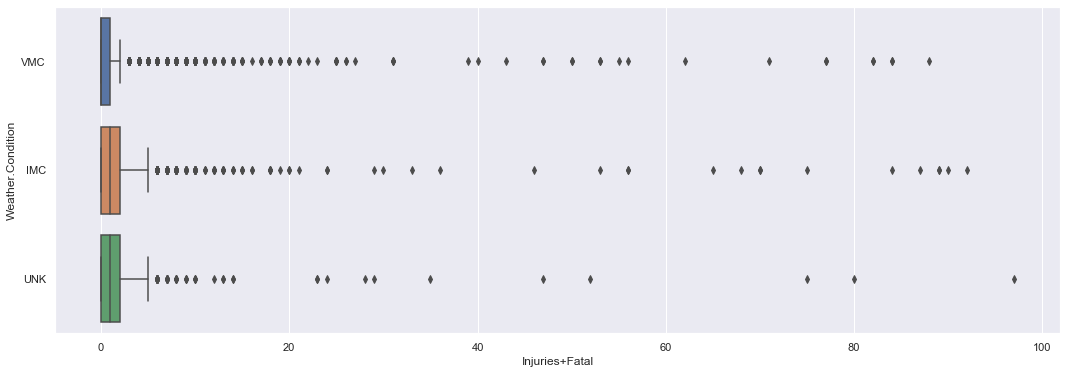

In [8]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x=air2["Injuries+Fatal"], y=air2["Weather.Condition"], orient = "h")

In [9]:
air3=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries",'Broad.Phase.of.Flight']])

In [10]:
air3=air3.dropna(how='any',axis=0)
air3["Injuries+Fatal"]=air3["Total.Fatal.Injuries"]+air3["Total.Serious.Injuries"]
air3=air3[(air3["Injuries+Fatal"]<100)]

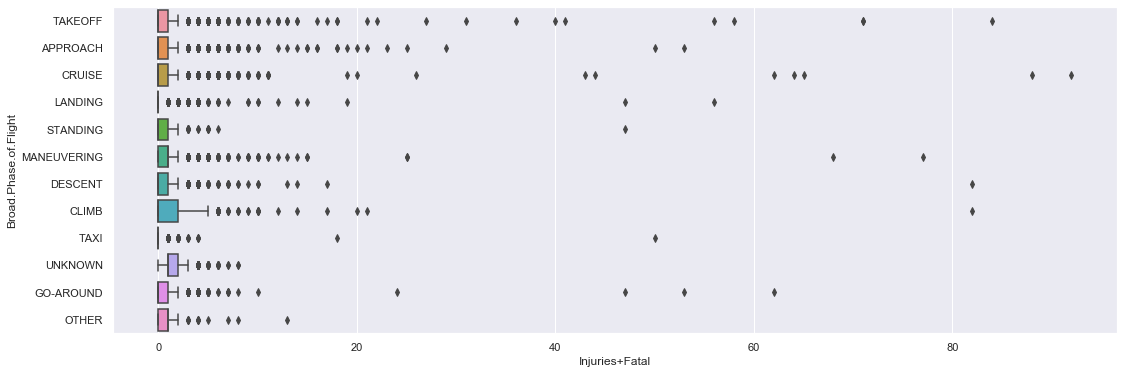

In [11]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x=air3["Injuries+Fatal"], y=air3['Broad.Phase.of.Flight'], orient = "h")

In [12]:
air4=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries",'Broad.Phase.of.Flight',"Weather.Condition","Purpose.of.Flight","Number.of.Engines","Engine.Type"]])

In [13]:
air4=air4.dropna(how='any',axis=0)
air4["Injuries+Fatal"]=air4["Total.Fatal.Injuries"]+air4["Total.Serious.Injuries"]

In [14]:
airgroup=air4.groupby(["Weather.Condition","Broad.Phase.of.Flight"])

In [15]:
airgroup.mean()

Total.Fatal.Injuries  \
Weather.Condition Broad.Phase.of.Flight                         
IMC               APPROACH                           1.871032   
                  CLIMB                              1.707143   
                  CRUISE                             1.449105   
                  DESCENT                            1.348624   
                  GO-AROUND                          1.771739   
                  LANDING                            0.156479   
                  MANEUVERING                        1.536680   
                  OTHER                              0.666667   
                  STANDING                           0.550000   
                  TAKEOFF                            1.419421   
                  TAXI                               0.239130   
                  UNKNOWN                            1.557377   
UNK               APPROACH                           1.294118   
                  CLIMB                              1.476190   
                  CRUISE                             1.748792   
                  DESCENT                            1.368421   
                  GO-AROUND                          0.000000   
                  LANDING                            0.089286   
                  MANEUVERING                        1.393939   
                  OTHER                              0.500000   
                  STANDING                           0.000000   
                  TAKEOFF                            0.631579   
                  TAXI                               0.000000   
                  UNKNOWN                            1.561798   
VMC               APPROACH                           0.384951   
                  CLIMB                              0.780660   
                  CRUISE                             0.400575   
                  DESCENT                            0.435558   
                  GO-AROUND                          0.276611   
                  LANDING                            0.027168   
                  MANEUVERING                        0.593665   
                  OTHER                              0.707317   
                  STANDING                           0.169184   
                  TAKEOFF                            0.290717   
                  TAXI                               0.022716   
                  UNKNOWN                            1.286374   

                                         Total.Serious.Injuries  \
Weather.Condition Broad.Phase.of.Flight                           
IMC               APPROACH                             0.439484   
                  CLIMB                                0.175000   
                  CRUISE                               0.201110   
                  DESCENT                              0.366972   
                  GO-AROUND                            0.478261   
                  LANDING                              0.239609   
                  MANEUVERING                          0.250965   
                  OTHER                                0.000000   
                  STANDING                             0.450000   
                  TAKEOFF                              0.390496   
                  TAXI                                 0.282609   
                  UNKNOWN                              0.098361   
UNK               APPROACH                             0.323529   
                  CLIMB                                0.142857   
                  CRUISE                               0.178744   
                  DESCENT                              0.105263   
                  GO-AROUND                            0.333333   
                  LANDING                              0.107143   
                  MANEUVERING                          0.166667   
                  OTHER                                0.000000   
                  STANDING                             0.200000   
                  TAKEOFF    

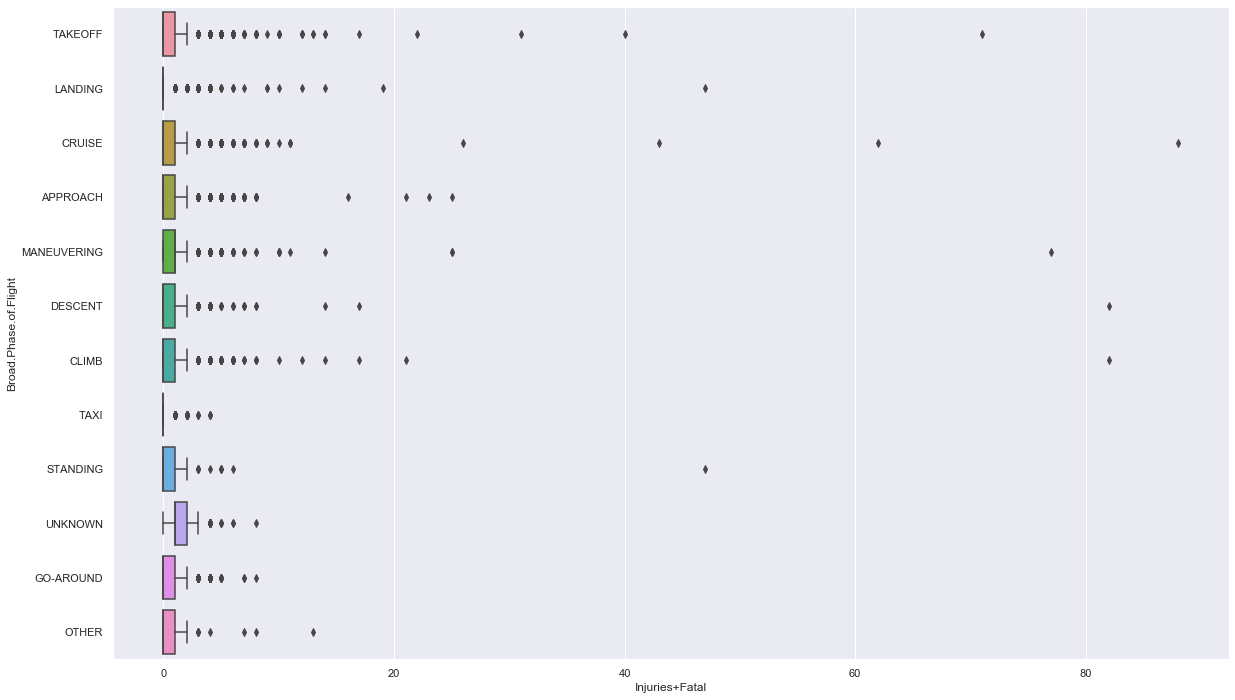

In [16]:
air5=air4[(air4["Weather.Condition"]=="VMC")&(air4["Injuries+Fatal"]<100)]
jointDF4 = pd.concat([air5['Injuries+Fatal'], air5['Broad.Phase.of.Flight'].reindex(index=air5['Injuries+Fatal'].index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x='Injuries+Fatal', y="Broad.Phase.of.Flight",data = jointDF4, orient = "h")

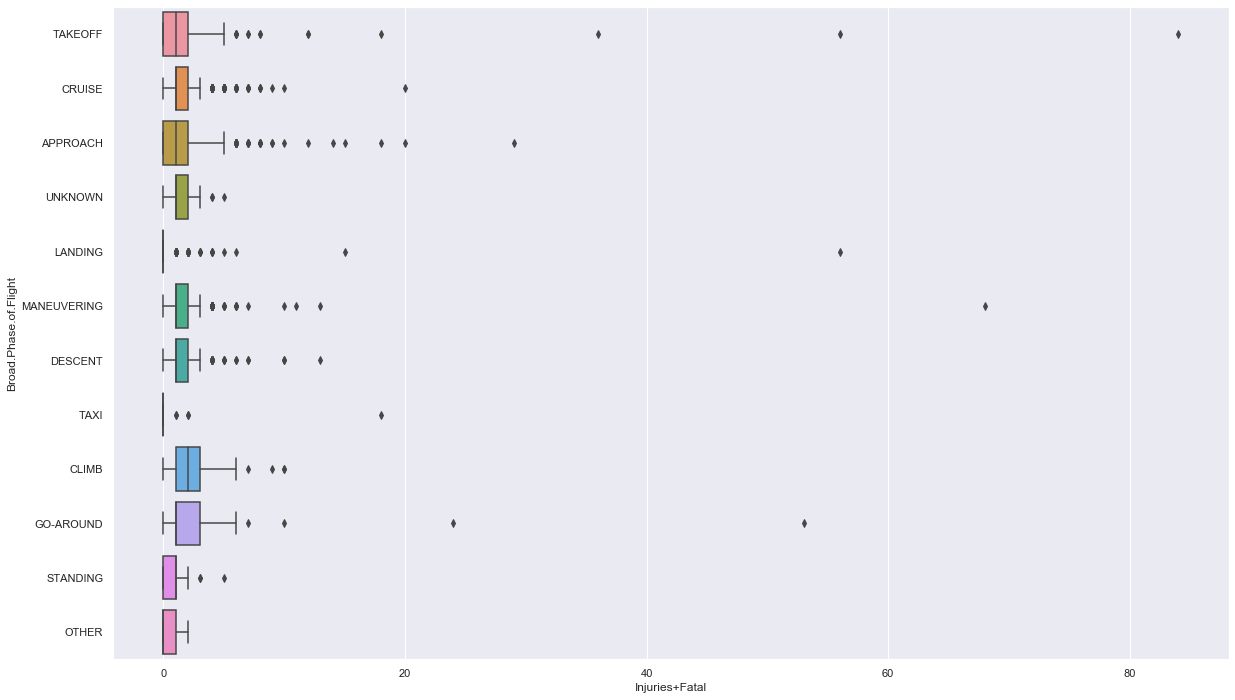

In [17]:
air5=air4[(air4["Weather.Condition"]=="IMC")&(air4["Injuries+Fatal"]<100)]
jointDF4 = pd.concat([air5['Injuries+Fatal'], air5['Broad.Phase.of.Flight'].reindex(index=air5['Injuries+Fatal'].index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x='Injuries+Fatal', y="Broad.Phase.of.Flight",data = jointDF4, orient = "h")

In [18]:
air6=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries","Purpose.of.Flight"]])
air6=air6.dropna(how='any',axis=0)
air6["Injuries+Fatal"]=air6["Total.Fatal.Injuries"]+air6["Total.Serious.Injuries"]
air6=air6[(air6["Purpose.of.Flight"]!="Unknown")&(air6["Injuries+Fatal"]<100)]
jointDF6 = pd.concat([air6["Injuries+Fatal"], air6['Purpose.of.Flight'].reindex(index=air6["Injuries+Fatal"].index)], sort = False, axis = 1)

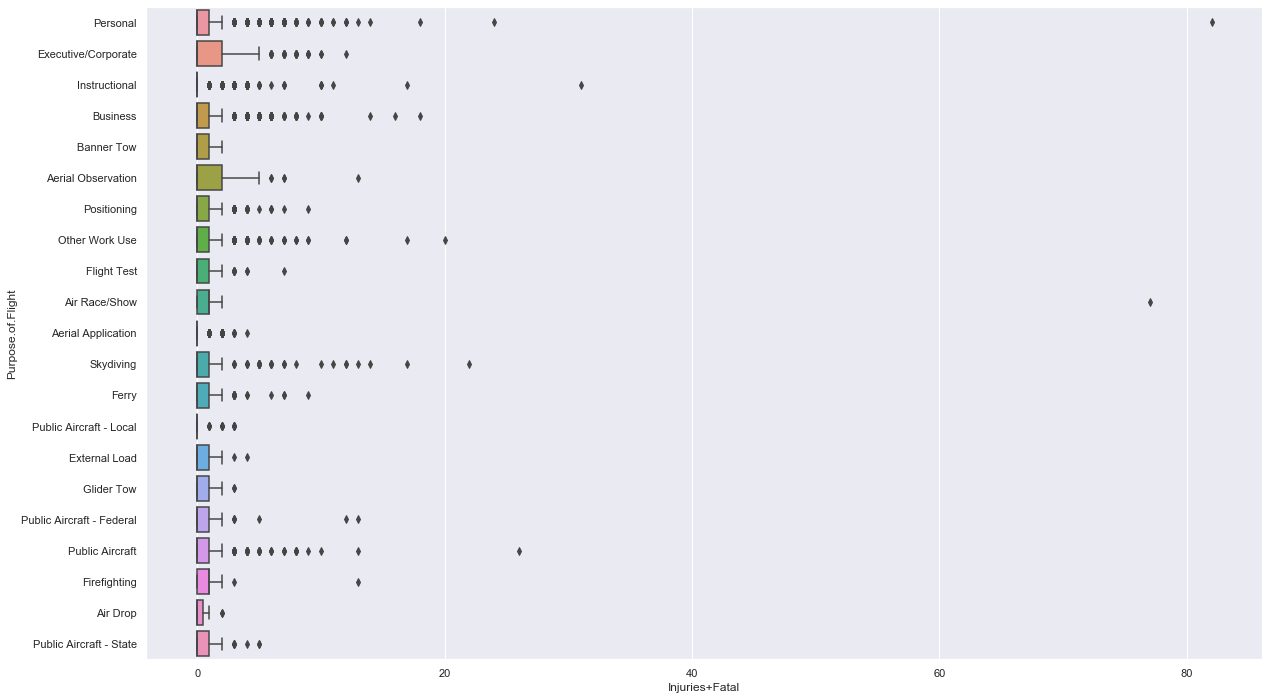

In [19]:

f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Injuries+Fatal", y="Purpose.of.Flight",data = jointDF6, orient = "h")

In [20]:
air7=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries","Engine.Type"]])
air7=air7.dropna(how='any',axis=0)
air7["Injuries+Fatal"]=air7["Total.Fatal.Injuries"]+air7["Total.Serious.Injuries"]
jointDF7 = pd.concat([air7["Injuries+Fatal"], air7['Engine.Type'].reindex(index=air7["Injuries+Fatal"].index)], sort = False, axis = 1)

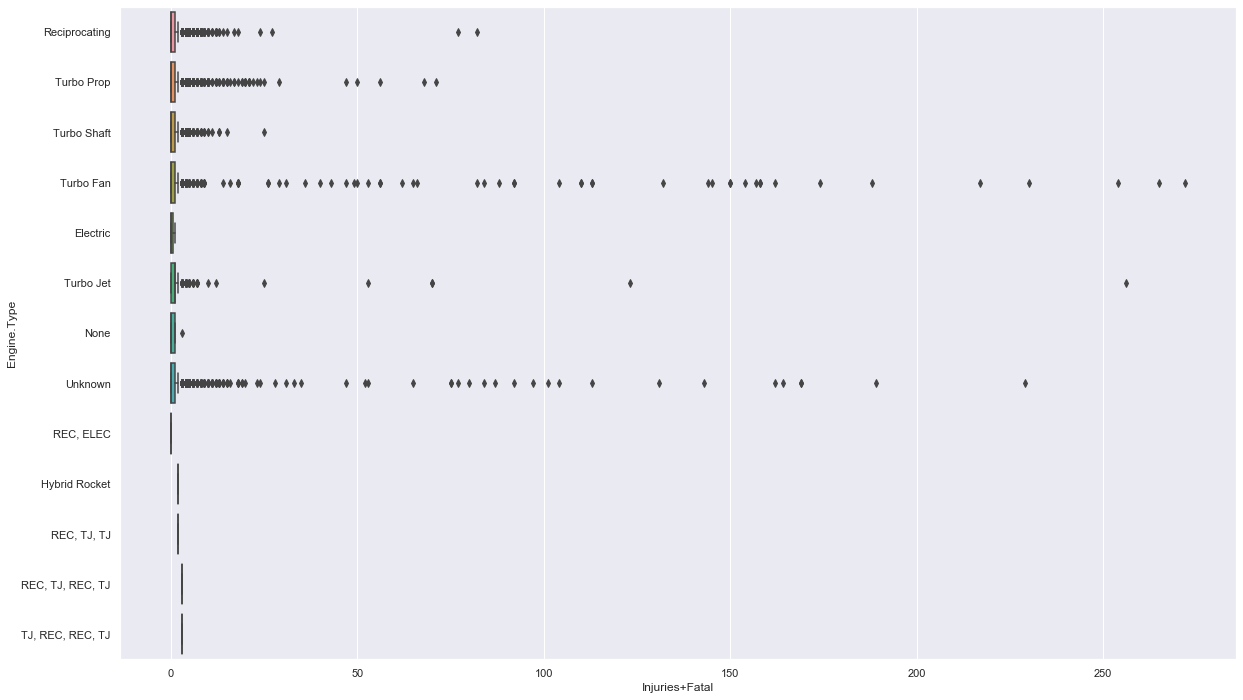

In [21]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Injuries+Fatal", y="Engine.Type",data = jointDF7, orient = "h")

In [22]:
air8=pd.DataFrame(air[["Total.Fatal.Injuries","Total.Serious.Injuries","Number.of.Engines"]])
air8=air8.dropna(how='any',axis=0)
air8["Injuries+Fatal"]=air8["Total.Fatal.Injuries"]+air8["Total.Serious.Injuries"]
jointDF8 = pd.concat([air8["Injuries+Fatal"], air8['Number.of.Engines'].reindex(index=air8["Injuries+Fatal"].index)], sort = False, axis = 1)

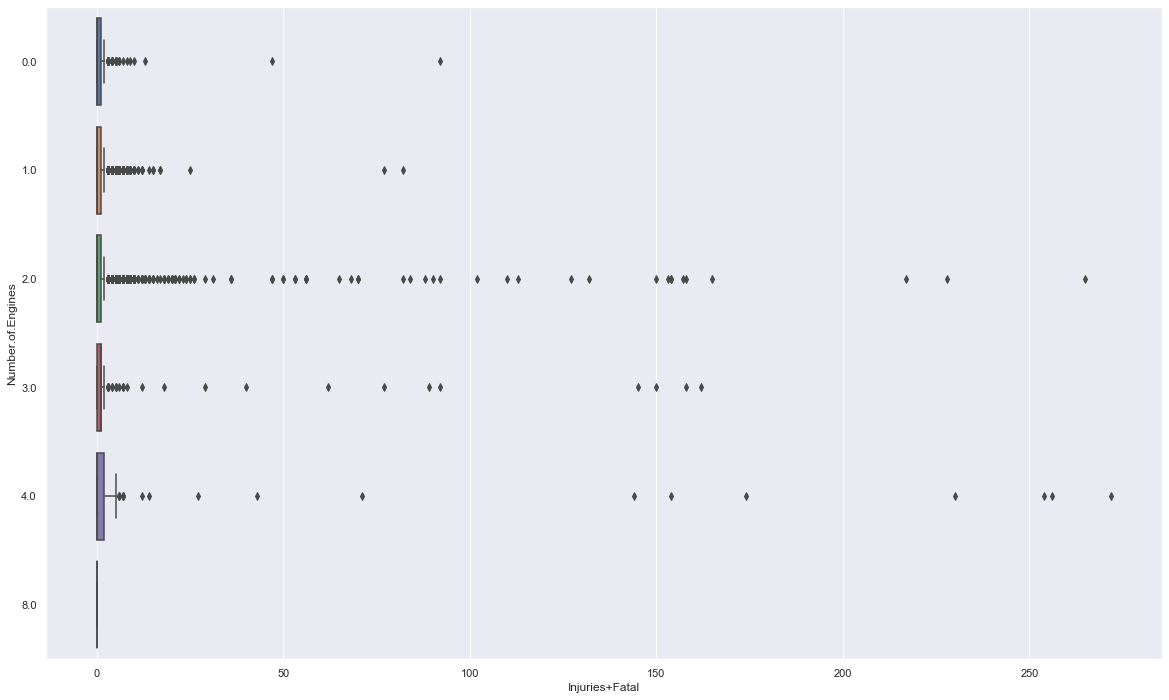

In [23]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Injuries+Fatal", y="Number.of.Engines",data = jointDF8, orient = "h")

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
air4["Weather"]=le.fit_transform(air4["Weather.Condition"])

In [27]:
air4["Phase"]=le.fit_transform(air4["Broad.Phase.of.Flight"])
air4["Purpose"]=le.fit_transform(air4["Purpose.of.Flight"])
air4["Engine"]=le.fit_transform(air4["Engine.Type"])

In [28]:
le.fit_transform(air4["Broad.Phase.of.Flight"])
Phase=le.transform(["TAKEOFF","APPROACH","CRUISE","LANDING","DESCENT","CLIMB","GO-AROUND","MANEUVERING","UNKNOWN","TAXI","STANDING","OTHER"])

In [29]:
air4["Dangerous"]=(air4["Injuries+Fatal"]>0)

In [30]:
Phase

array([ 9,  0,  2,  5,  3,  1,  4,  6, 11, 10,  8,  7], dtype=int64)

In [31]:
air4

,Total.Fatal.Injuries,Total.Serious.Injuries,Broad.Phase.of.Flight,Weather.Condition,Purpose.of.Flight,Number.of.Engines,Engine.Type,Injuries+Fatal,Weather,Phase,Purpose,Engine,Dangerous
0,0.0,0.0,TAKEOFF,VMC,Personal,1.0,Reciprocating,0.0,2,9,14,4,False
1,2.0,0.0,TAKEOFF,VMC,Personal,1.0,Reciprocating,2.0,2,9,14,4,True
5,5.0,2.0,TAKEOFF,IMC,Executive/Corporate,2.0,Turbo Prop,7.0,0,9,6,8,True
14,0.0,0.0,LANDING,VMC,Instructional,1.0,Reciprocating,0.0,2,5,12,4,False
21,0.0,0.0,CRUISE,VMC,Personal,1.0,Reciprocating,0.0,2,2,14,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84255,4.0,0.0,UNKNOWN,IMC,Personal,1.0,Reciprocating,4.0,0,11,14,4,True
84258,2.0,0.0,CRUISE,IMC,Personal,1.0,Reciprocating,2.0,0,2,14,4,True
84259,3.0,0.0,CRUISE,IMC,Personal,1.0,Reciprocating,3.0,0,2,14,4,True
84260,4.0,0.0,UNKNOWN,UNK,Personal,1.0,Reciprocating,4.0,1,11,14,4,True


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7592729198585182

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7587811382851954



'C:\Users\Benjamin' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\Benjamin' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

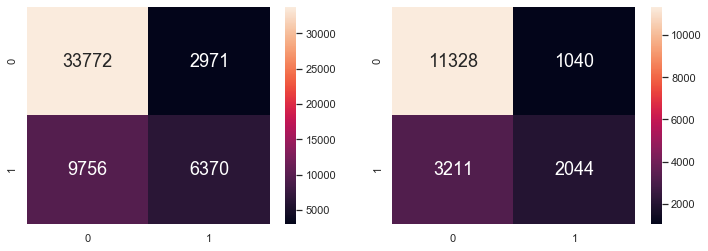

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
predictors = ["Weather","Phase","Purpose","Number.of.Engines","Engine"]

y = pd.DataFrame(air4['Dangerous'])
X = pd.DataFrame(air4[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)